In [1]:
# hack to make notebook appear full-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [104]:
import math
import csv
import pickle
from collections import namedtuple, defaultdict
import time
from glob import glob
import numpy as np
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Circle, ConnectionPatch

import pandas as pd

import mapalgo
import viewmap
import graphs

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [121]:
import importlib
importlib.reload(viewmap)
importlib.reload(mapalgo)
importlib.reload(graphs)

<module 'graphs' from '/Users/dbeach/Desktop/stableyes/src/graphs.py'>

In [71]:
data = pd.read_csv("/Users/dbeach/Desktop/CollegeMsg.txt", delim_whitespace=True, names=["i", "j", "t"])

In [90]:
data[0:20]

,i,j,t
0,1,2,1082040961
1,3,4,1082155839
2,5,2,1082414391
3,6,7,1082439619
4,8,7,1082439756
5,9,10,1082440403
6,9,11,1082440453
7,12,13,1082441188
8,9,14,1082441754
9,9,15,1082441824


In [72]:
N = 1899
tally1 = graphs.ConnectionTally(N)
for index,(i,j,t) in data[0:10000].iterrows():
    tally1.connect(i, j)

In [84]:
p1 = mapalgo.weights_to_condprob(tally1.to_sparse_matrix().toarray())
#p1 = mapalgo.propagate_with_decay(p1, n=4, gamma=0.5)

In [85]:
pmap1 = mapalgo.create_map("Social 1", p1)

In [125]:
tally2 = graphs.ConnectionTally(N)
for index,(i,j,t) in data[5000:15000].iterrows():
    tally2.connect(i, j)

In [126]:
p2 = mapalgo.weights_to_condprob(tally2.to_sparse_matrix().toarray())
#p2 = mapalgo.propagate_with_decay(p2, n=4, gamma=0.5)

In [127]:
pmaps2 = [mapalgo.create_map(f"Social 2; gamma={gamma}", p2, prior=pmap1, gamma=gamma)
          for gamma in [1e-1, 1e-2, 1e-3, 1e-4, 0.0]]

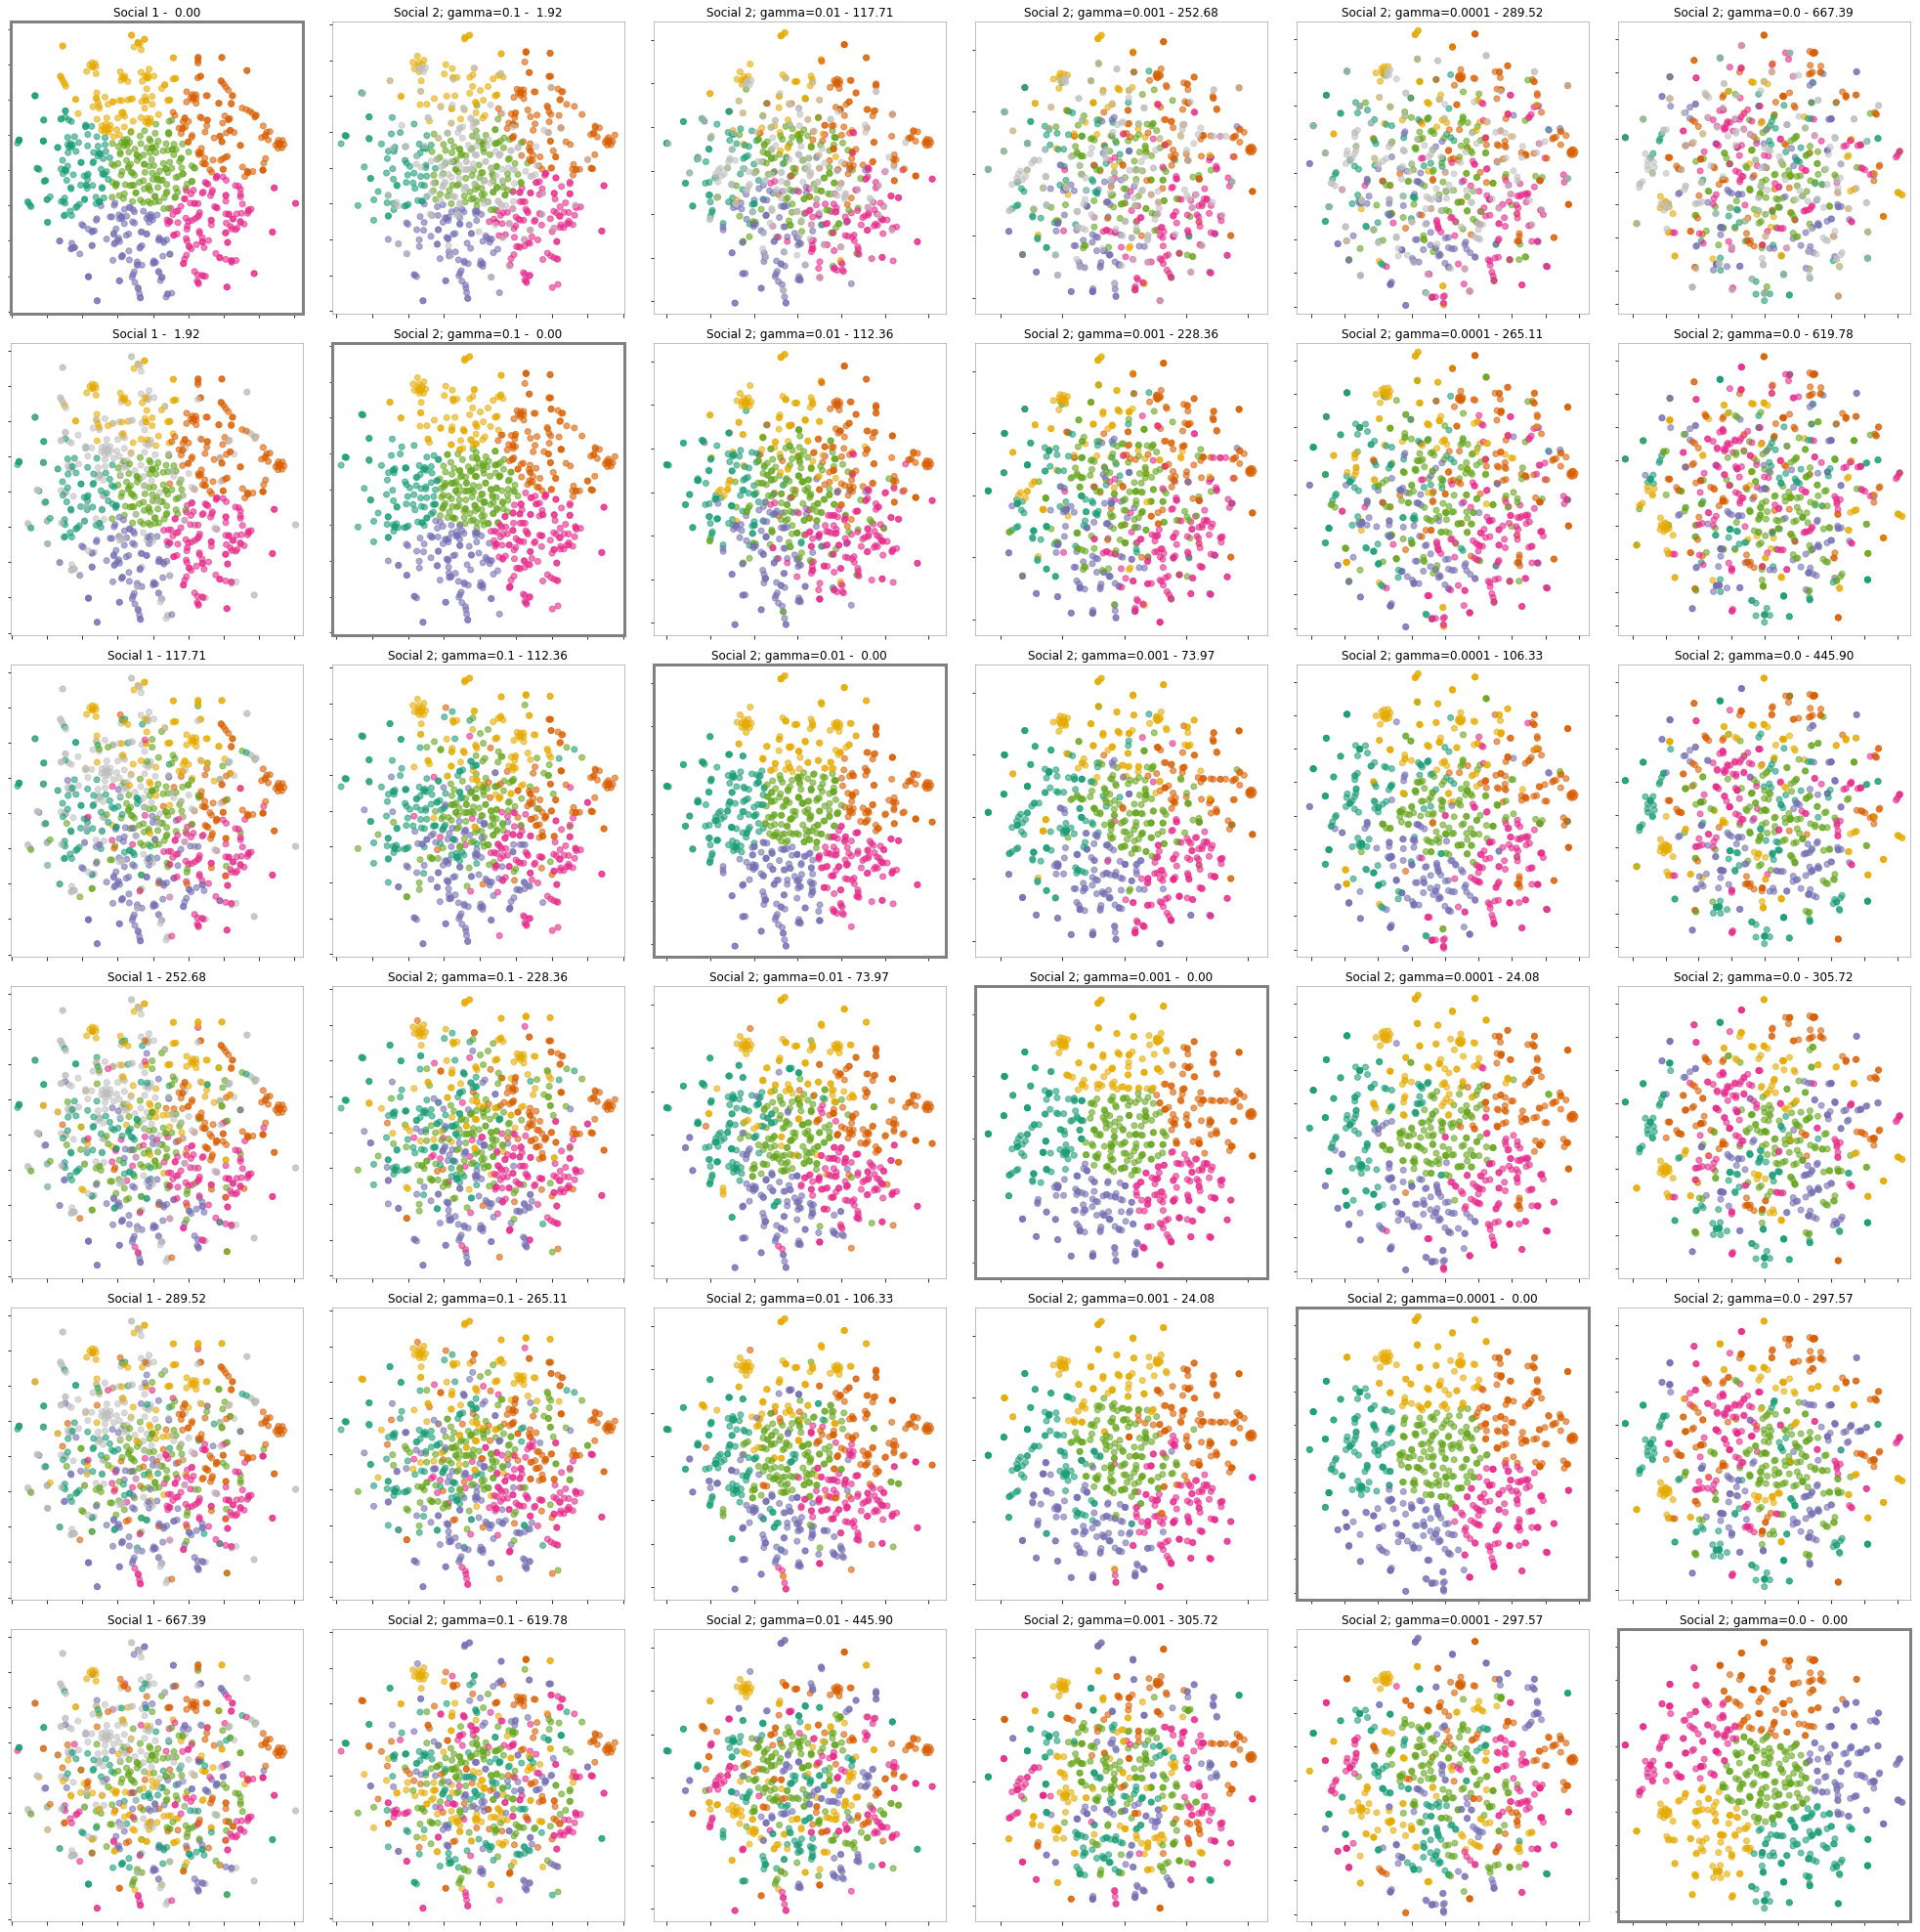

In [128]:
viewmap.show_map_matrix([pmap1] + pmaps2, size=30)